# Filtración de Vietoris-Rips

Como conjunto de datos, se usan palabras. La lista de palabras es:


Se hace una filtracion de vietoris-rips en los datos

In [1]:
import numpy as np
from itertools import chain, combinations
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull

### Definir el conjunto de datos

In [26]:
# lista de palabras con el mismo numero de letras
datos = ["hola", "gato", "pato", "cola", "coma", "malo", "mano", "toga", "cosa", "casa", "pasa"]

#datos = ["gato", "pato", "cola", "casa", "pasa"]

# ver cuantas palarbas hay
num_datos = len(datos)
print(f"Hay {num_datos} palabras")

# ver que todas tengan el mismo numero de letras
tamaños = [len(word) for word in datos]
assert len(set(tamaños)) == 1 # todas del mismo tamaño

# ver cual es el tamaño comun
num_letras = tamaños[0]
print(f"Todas las palabras tienen {num_letras} letras")

Hay 11 palabras
Todas las palabras tienen 4 letras


### Definir la metrica

Se usa la distancia de Hamming

In [3]:
# distancia entre dos palabras
def d(w1, w2):
    # la distancia empieza en 0
    distancia  = 0
    
    # por cada disimilitud en letras, aumentar en uno
    for idx in range(num_letras):
        if w1[idx] != w2[idx]:
            distancia += 1
    
    # devolver distancia
    return distancia

### Hacer la matriz de distancias

Bonus

In [4]:
def hacer_matriz_distancias(datos, metrica):
    ''' 
    Argumentos
    datos: conjunto de datos
    metrica: funcion de distancia
    
    Se construye la matriz de distancia asociada a estos datos
    con la metrica dada
    matriz_distanica[i, j] = distancia(dato_i, dato_j)
    
    Se devuelve esta matrz
    '''
    
    # ver cuantos datos hay
    numero_datos = len(datos)
    
    # inicializar la matriz en ceros
    matriz_distanicas = np.zeros((numero_datos, numero_datos))

    # iterar en las filas
    for i in range(numero_datos):
        # iterar en las columans:
        for j in range(numero_datos):
            # poner la diferencia en esa entrada
            matriz_distanicas[i, j] = metrica(datos[i], datos[j])
            
    # devolverla
    return matriz_distanicas

### Funciones auxiliares

Para posteriormente hace la filtración de Vietoris-Rips

Funcion que obtiene todos los subconjuntos no vacios de una lista

In [5]:
def obtener_subconjuntos_no_vacios(lista):
    
    # convierte la lista en un iterable
    lista_iterable = iter(lista)
    
    # genera todos los subconjuntos posibles, que no sean vacios
    subconjuntos = chain.from_iterable(combinations(lista, size) for size in range(1, len(lista) + 1))
    
    # hacer que los elementos sean listas, y que todo sea una lista
    subconjuntos = list([list(elemento) for elemento in subconjuntos])
    
    return subconjuntos

In [6]:
def indices_de_simplejo(indices, matriz_dist, epsilon):
    '''
    Argumentos:
    indices: lista de indices de elementos de los datos
    matriz_dist: matriz de distancia de los datos
    epsilon: argumento para la consieracion del complejo VR
    
    Devuelve True si los indices son de un simplejo
    o Falso si no lo son
    '''
    
    # una lista de indices define un simplejo
    # si la distancia entre todos los pares es menor a epsilon
    
    # considerar que al principio
    # se asumeq que son indices de simplejos
    valido = True
    
    
    # iterar en todos los pares
    for par in combinations(indices, 2):
        
        # si la distancia entre este par es mayor a espilon
        # entonces los indices no son de un simplejo
        if matriz_dist[par[0], par[1]] > epsilon:
            # no son indices de un simplejo
            valido = False
    
    return valido

### Filtración de Vietoris-Rips

In [68]:
def VR(datos, metrica, epsilon):
    ''' 
    Argumentos
    datos: conjunto de datos
    metrica: funcion de distancia entre los datos
    Estos dos argumentos definen un espacio metrico finito (datos)
    epsilon: argumento para la construccion del complejo
    
    Se construye el complejo de Vietoris-Rips asociado a estos datos,
    con el epsilon dado. Usa fuerza bruta
    
    Se devuelve el complejo simplicial abstracto
    '''
    
    print("Los datos son:")
    print(datos)
    print(" ")
    
    # hacer los indices de los datos, para manejo mas facil
    indices_datos = list(range(len(datos)))
    
    # ver todos los subconjuntos posibles de estos indices, no vacios 
    # esto es, los indices de los posibles simplejos
    subconjuntos_indices = obtener_subconjuntos_no_vacios(indices_datos)
    
    # asegurar que se tengan los que se esperan
    assert len(subconjuntos_indices) == 2**(len(datos)) - 1
    
    # se tiene la metrica y los datos
    # obtener la matriz de distancias de los datos
    matriz_dist = hacer_matriz_distancias(datos, metrica)
    
    # ir guardando todos los simplejos del complejo simplicial
    # en una lista, comienza vacia
    complejo_simplicial = []
    
    # iterar en todos los posibles simplejos
    # mas bien, en los indices de todos los posibles simplejos
    for indices in subconjuntos_indices:
        
        # checar si estos indices representan un simplejo
        if indices_de_simplejo(indices, matriz_dist, epsilon):
            
            # obtener el simplejo, solo se tienen los indices
            simplejo = [datos[i] for i in indices]
            
            # añadrirlo al complejo simplicial, como conjunto
            complejo_simplicial.append(set(simplejo))    
        
    ####################################################
    ####################################################
    # Dibujar??

    # reducir las dimensiones a 2, para graficar
    pca = PCA(n_components=2)
    
    # se toman como vectorizaciones las distancias entre puntos
    # se pasan a dos dimensiones para graficar
    coordenadas = pca.fit_transform(matriz_dist)
    
    # tomar coordenadas x,y de los datos
    x = [coord_x_y[0] for coord_x_y in coordenadas]
    y = [coord_x_y[1] for coord_x_y in coordenadas]
    
    
    # hacer la grafica
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # poner los puntos
    plt.scatter(x, y, c = 'red')
    
    # poner la etiqueta de la palabra en cada punto
    for i, palabra in enumerate(datos):
        plt.annotate(palabra, (x[i], y[i]), textcoords="offset points", xytext=(-15, 15), ha='center')
        
        
    # graficar cada simplejo
    # iterar en ellos
    for simplejo in complejo_simplicial:
        
        # obtener los indices de las palabras del simlpejo
        indices_simplejo = [datos.index(palabra) for palabra in simplejo]
        # obtener las coordenadas x,y de cada elemento del simplejo
        coordenadas_simplejo = np.array([list(coordenadas[i]) for i in indices_simplejo])
        
        # obtener la longuitud del simplejo
        len_simplejo = len(simplejo)
        
        
        # los colores de los simplejos cambian de acuerdo 
        # al numero de vertices
        colores_simplejos = {1: 'red', 2: 'black', 3: 'green', 4:'blue', 5:'purple', 6:'orange', 7:'yellow'}

        
        # SIMPLEJOS DE DIMENSION 0 (1 ELEMENTO)
        # Estos son solo puntos, y estos ya se pusieron
        # no se hace nada
        if len_simplejo == 1:
            continue
            
        # SIMPLEJOS DE DIMENSION 1 (2 ELEMENTOS)
        # Estos solo son lineas entre puntos
        if len_simplejo == 2:
            plt.plot(coordenadas_simplejo[:, 0], coordenadas_simplejo[:, 1], 'k-')
            continue
            
            
        # SIMPLEJOS CON DIMENSION AL MENOS 2 (AL MENOS 3 ELEMENTOS)
        # ver si se puede asignar un color al simplejo
        # de acuerdo a su longuitud (aca len_simplejo>=3)
        if len_simplejo in colores_simplejos.keys():
            color = colores_simplejos[len_simplejo]
        # si no se puede asignar un color, se usa gris
        # es decir, si tiene longuitud mayor a 8
        else:
            color = 'gray'
    
        # Rellenar el simplejo con su color correspondiente
        
        # primero se calcula la envolvente convexa
        hull = ConvexHull(coordenadas_simplejo)
        # esta da el orden de los vertices que se va a considerar
        # para dibujar el simplejo
        vertices_ordenados = coordenadas_simplejo[hull.vertices]

        # rellenar el simplejo
        ax.fill(vertices_ordenados[:, 0], vertices_ordenados[:, 1], color, alpha = 0.6)
    
    
    # poner leyenda
    # obtener la longuitud del simplejo mayor
    longuitudes_simplejos = [len(simplejo) for simplejo in complejo_simplicial]
    len_simplejo_max = np.array(longuitudes_simplejos).max()
    
    # ir poniendo hasta el mayor, se pone la leyenda en cada uno
    for i in range(1, min(len_simplejo_max+1, 8)):
        label = f"Simplejos de dimension {i-1}"
        ax.plot([], [], 'o', color=colores_simplejos[i], markersize=5, label=label)
    # si es mayor a 7, es que hay uno gris, un simplejo con mas de 7 elementos
    if len_simplejo_max > 7:
        ax.plot([], [], 'o', color='gray', markersize=5, label=f"Simplejos de dimension mayor a 6")
    # poner la legenda
    ax.legend()
    
    
    # detalles de la grafica y guardar
    name  = f"Filtracion VR, epsilon = {epsilon}"
    plt.title(name)
    plt.axis('off')
    plt.savefig(name + '.png',  bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
    ####################################################
    ####################################################
    
    # ver unas cosas del complejos simplicial
    
    print("La matriz de distancias es:")
    print(matriz_dist)
    print(" ")
    
    print(f"Se usa epsilon = {epsilon}")
    print(" ")
    
    
    print("Simplejos del complejo de Vietoris-Rips:")
    for simplejo in complejo_simplicial:
        print(simplejo)

Los datos son:
['hola', 'gato', 'pato', 'cola', 'coma', 'malo', 'mano', 'toga', 'cosa', 'casa', 'pasa']
 


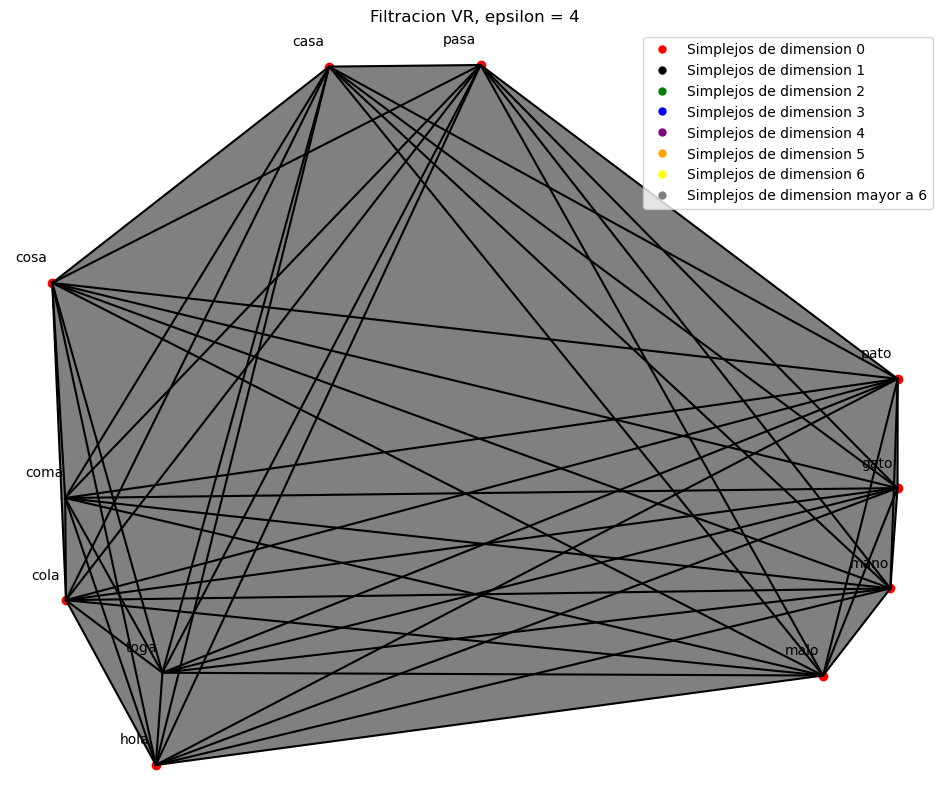

La matriz de distancias es:
[[0. 4. 4. 1. 2. 3. 4. 2. 2. 3. 3.]
 [4. 0. 1. 4. 4. 2. 2. 4. 4. 3. 3.]
 [4. 1. 0. 4. 4. 2. 2. 4. 4. 3. 2.]
 [1. 4. 4. 0. 1. 3. 4. 2. 1. 2. 3.]
 [2. 4. 4. 1. 0. 4. 4. 2. 1. 2. 3.]
 [3. 2. 2. 3. 4. 0. 1. 4. 4. 3. 3.]
 [4. 2. 2. 4. 4. 1. 0. 4. 4. 3. 3.]
 [2. 4. 4. 2. 2. 4. 4. 0. 2. 3. 3.]
 [2. 4. 4. 1. 1. 4. 4. 2. 0. 1. 2.]
 [3. 3. 3. 2. 2. 3. 3. 3. 1. 0. 1.]
 [3. 3. 2. 3. 3. 3. 3. 3. 2. 1. 0.]]
 
Se usa epsilon = 4
 
Simplejos del complejo de Vietoris-Rips:
{'hola'}
{'gato'}
{'pato'}
{'cola'}
{'coma'}
{'malo'}
{'mano'}
{'toga'}
{'cosa'}
{'casa'}
{'pasa'}
{'hola', 'gato'}
{'hola', 'pato'}
{'hola', 'cola'}
{'hola', 'coma'}
{'malo', 'hola'}
{'hola', 'mano'}
{'hola', 'toga'}
{'hola', 'cosa'}
{'hola', 'casa'}
{'hola', 'pasa'}
{'pato', 'gato'}
{'cola', 'gato'}
{'coma', 'gato'}
{'malo', 'gato'}
{'mano', 'gato'}
{'toga', 'gato'}
{'cosa', 'gato'}
{'casa', 'gato'}
{'pasa', 'gato'}
{'pato', 'cola'}
{'pato', 'coma'}
{'malo', 'pato'}
{'pato', 'mano'}
{'toga', 'pato'}
{'pa

In [73]:
# hacer el complejo de Vietoris-Rips de los datos
VR(datos, d, 4)